In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('customer_churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.drop('customerID', axis=1, inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.replace({
  'No':0,
  'Yes':1
}, inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [8]:
df.replace({
  'Male':1,
  'Female':0
}, inplace=True)

In [9]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [22]:
df.InternetService.replace({
  'DSL':1,
  'Fiber optic':2
}, inplace=True)

In [11]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
df.Contract.replace({
  'Month-to-month':0,
  'One year':1,
  'Two year':2
}, inplace=True)

In [13]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
df.PaymentMethod.replace({
  'Electronic check':0, 
  'Mailed check':1, 
  'Bank transfer (automatic)':2,
  'Credit card (automatic)':3
}, inplace=True)

In [15]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [16]:
df.replace({
  'No internet service': 'No',
  'No phone service': 'No'
}, inplace=True)

In [17]:
df.replace({
  'No':0,
  'Yes':1
}, inplace=True)

In [23]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [24]:
df_copy = df.copy()

In [33]:
indices = df[df.TotalCharges == " "].index

In [37]:
df.drop(indices, axis=0, inplace=True)

In [38]:
df_copy = df.copy()
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [39]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [46]:
df_copy = df.copy()

In [47]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [48]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5,0,0,0,0,0.098592,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
6,1,0,0,1,0.295775,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
7,0,0,0,0,0.126761,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
8,0,0,1,0,0.380282,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
9,1,0,0,1,0.859155,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [49]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [50]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5,0,0,0,0,0.098592,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
6,1,0,0,1,0.295775,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
7,0,0,0,0,0.126761,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
8,0,0,1,0,0.380282,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
9,1,0,0,1,0.859155,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [51]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [52]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1)

In [53]:
xtrain.shape

(5625, 26)

In [54]:
xtest.shape

(1407, 26)

In [61]:
model = keras.Sequential([
  keras.layers.Dense(26, input_shape=(26,), activation='softmax'),
  keras.layers.Dense(13, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.7316
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7559
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7897
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7943
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.7938
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7977
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8004
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8014
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8050
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4185 - accura

In [62]:
model.evaluate(xtest, ytest)

44/44 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7889


[0.42716163396835327, 0.7889125943183899]

In [63]:
ypred = []
yp = model.predict(xtest)

for element in yp:
  if element > 0.5:
    ypred.append(1)
  else:
    ypred.append(0)

44/44 [==============================] - 0s 2ms/step


In [64]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.61      0.53      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

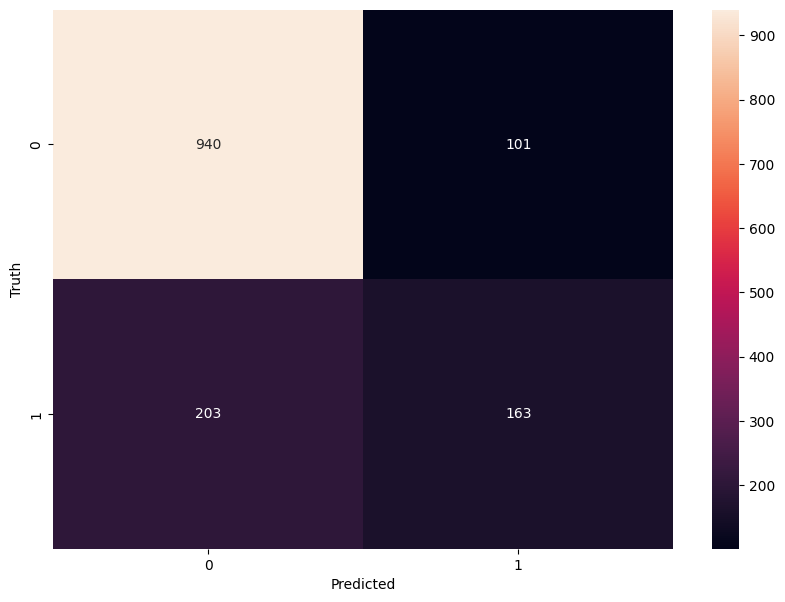

In [60]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')